<a href="https://colab.research.google.com/github/fredymendezbustamante/MODELADO_Y_SIMULACION-/blob/master/MELO_Prediccion_de_insuficiencia_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#cargar datos desde drive acceso libre
FILEID = "1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-10-12 21:55:31--  https://docs.google.com/uc?export=download&confirm=&id=1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT
Resolving docs.google.com (docs.google.com)... 108.177.127.113, 108.177.127.138, 108.177.127.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-4g-docs.googleusercontent.com/docs/securesc/fmrm1m0k4jhe537337rnaa42vb1jqjg9/b9ck20p7f8ulefmvq5vosgc8cj4d13e9/1602539700000/11461795404018529722/02569955998811692823Z/1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT?e=download [following]
--2020-10-12 21:55:32--  https://doc-0c-4g-docs.googleusercontent.com/docs/securesc/fmrm1m0k4jhe537337rnaa42vb1jqjg9/b9ck20p7f8ulefmvq5vosgc8cj4d13e9/1602539700000/11461795404018529722/02569955998811692823Z/1Fx8V-8KUcatpoR7VQBlr-rHJNlXnfKIT?e=download
Resolving doc-0c-4g-docs.googleusercontent.com (doc-0c-4g-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connectin

# Inicio códigos

**Preparar modulos principales, funciones inline, paths para guardar archivos y figuras:**


In [32]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# magic function to render figure
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
import plotly.figure_factory as ff


Carpeta results ya existe


# Obtener los datos

In [20]:
import pandas as pd
%matplotlib inline
csv_analisispredictorio = 'heart_failure_clinical_records_dataset.csv'
pincardi= pd.read_csv(csv_analisispredictorio)   
pincardi.head(20) 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


* Sex - sexo del paciente   hombre=> 1, mujer =>0

* Age - año del paciente

* Diabetes - 0 => No, 1 => si

* Anaemia - 0 => No, 1 => si

* High_blood_pressure - 0 => No, 1 => si

* Smoking - 0 => No, 1 => si

* DEATH_EVENT - 0 => No, 1 => si

# Análisis exploratorio básico


In [21]:
pincardi.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [22]:
# paso 2: partición entrenamiento y validacion.
# tamañ0 Xtrain 70%, Tamaño Xtest 30%.
#en mi caso el analisis de datos esta adecuada para hace 
# un buen analisis,no es conveniente codificar..

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(pincardi,test_size=0.3)
col_smoke = "smoking"
ytrain = Xtrain[col_smoke]
ytest = Xtest[col_smoke]
Xtrain.drop(columns=col_smoke,inplace=True)
Xtest.drop(columns=col_smoke,inplace= True)






In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
ytrain = imputer.fit_transform(pd.DataFrame(ytrain))
ytrain = ytrain.reshape(-1)

ytest = imputer.transform(pd.DataFrame(ytest))
ytest = ytest.reshape(-1)

print(ytrain.shape,ytest.shape)


(209,) (90,)


In [24]:
#codificar la salida
#en este caso no hay necesidad de codificar,pues los datos estan
#organizados y nos ahorramos esa parte...
# 1-->fuma y 0-->no fuma
ytrain[:4]

array([0, 0, 1, 0])

In [25]:
ytest[-1]

1

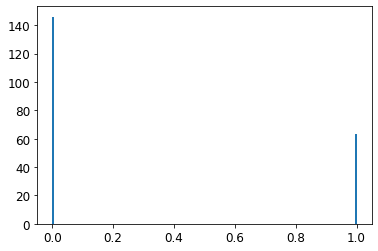

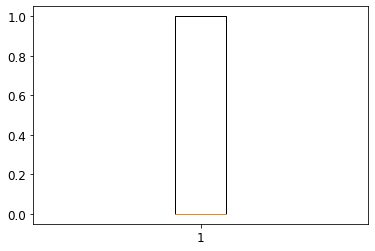

In [26]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins=200)
plt.show()

plt.boxplot(ytrain)
plt.show()

#podemos deducur que hay mas gente que no fuma,pero este dato no es SUFICIENTE 
# PARA GENERAR UNA PRECDICCION MAS CERTERA.

In [27]:
# definir columnas tipo string para año y deceso"no necesita decodificar", estdistica
# de pincardi y categorias.

col_añde = ['age','DEATH_EVENT','sex','smoking']; #columna de año y deceso de una persona

col_pincardi =['anaemia','creatinine_phosphokinase','diabetes',
               'ejection_fraction','high_blood_pressure','platelets',
               'serum_creatinine','serum_sodium']; # estadistica de para
                                   #prediccion de insuficiencia cardiaca.

#cat =  ['sex','smoking']  #categorias     

#items=[]

#for i in cat:
#   items += [list(pincardi[i].value_counts().index)]
#cat_usr = dict(zip(cat,items))   



In [28]:
#crear clase propia de proceso para prediccion de insuficiencia cardiaca

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder


class dummy_picard(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, col_añde,col_pincardi,): #constructor clase
        self.col_añde = col_añde #lista atributos tipo moneda
        self.col_pincardi = col_pincardi #lista atributos tipo estadistica
        #self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo modo
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        #print(a)
        self.imputer_num.fit(Xi[self.a]) # ajustar imputador  

        return self
        
    def fit_transform(self,X,*_):
         self.fit(X)
         return self.transform(X)

In [29]:
#dummy = dummy_picard(col_añde=col_añde,col_pincardi=col_pincardi)

#xtrain_pre =dummy.fit_transform(Xtrain)
#Xtrain_pre = dummy.fit_transform(Xtrain)

'''no es necesario crear clase propia de procesos,pues esta base de datos 
ya esta bien organizada y no seria optimo volver a procesar los mismos datos para obtener
los mismos datos,asi que podemos hacer la predicción de la o las variables de 
interes apartir de estos datos.'''

'no es necesario crear clase propia de procesos,pues esta base de datos \nya esta bien organizada y no seria optimo volver a procesar los mismos datos para obtener\nlos mismos datos,asi que podemos hacer la predicción de la o las variables de \ninteres apartir de estos datos.'

PREDICCIONDE VARIABLES DE INTERES.

# vamos analizar dos cosas.

## 1). el año y el sexo de una persona para saber si es un indicasor de evento de muerte.

## 2). si los fumadores y el sexo de una persona es un indicador de los eventos de muerte.

In [34]:
# 1. El año y el sexo de una persona para saber si es un indicasor de evento de muerte

analisis_cora =[pincardi["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(analisis_cora, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

In [ ]:
pincardi.info()
